In [2]:
import os, shutil
import cv2
from PIL import Image
from osgeo import gdal, ogr
import matplotlib.pyplot as plt 
import numpy as np
from rasterio.plot import show_hist
import rasterio
from rasterio.plot import show

from torchvision.transforms import ToTensor

##### Moving Data

In [6]:
path = 'SAT DATA/dat'
moveto = 'SAT DATA'
files = os.listdir(path)


In [13]:
for f in files:
    if '.jpg' in f:
        src = path+'/'+f
        dst = moveto+'/'+f
        shutil.move(src,dst)

###### Reading the Tiff files

In [208]:
#opening the tiff files
path = 'SAT_DATA/images/'
t_files = os.listdir(path)


In [209]:
print(t_files)

['L8_121061_040919_002.tif', 'L8_125061_160919_006.tif', 'L8_121061_040919_001.tif', 'L8_120062_270719_001.tif', 'L8_121061_200919_002.tif', 'L8_122059_080321_001.tif', 'L8_118062_011019_006.tif', 'L8_127059_290819_004.tif', 'L8_118062_300819_002.tif', 'L8_126059_050421_001.tif', 'L8_125060_130321_006.tif', 'L8_127059_280719_001.tif', 'L8_118062_300819_001.tif', 'L8_122060_080321_003.tif', 'L8_116058_031019_001.tif', 'L8_125059_130321_006.tif', 'L8_125061_310819_001.tif', 'L8_126059_050421_002.tif', 'L8_127059_070419_002.tif', 'L8_117062_230819_006.tif', 'L8_121060_170321_010.tif', 'L8_120062_250619_002.tif', 'L8_117062_240919_006.tif', 'L8_125061_030119_002.tif', 'L8_126059_050421_005.tif', 'L8_126059_310319_001.tif', 'L8_120062_100321_006.tif', 'L8_131057_090819_001.tif', 'L8_120062_100321_002.tif', 'L8_118062_011019_001.tif', 'L8_125059_130321_004.tif', 'L8_122059_040419_001.tif', 'L8_119062_060919_001.tif', 'L8_118062_300819_003.tif', 'L8_117062_240919_008.tif', 'L8_127059_070419_0

In [210]:
print(len(t_files))

227


In [191]:

with rasterio.open(path+'/'+t_files[50]) as image:
    image_array = image.read()
    #image_array = np.transpose(image_array, (1, 2, 0))
    
    if image_array.dtype != 'uint8':
        image_array = (image_array / np.max(image_array)) * 255
        image_array = image_array.astype('uint8')

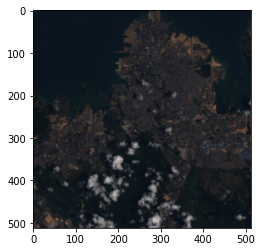

<Axes: >

In [192]:
#Showing images
show(image_array[[3,2,1],:,:])


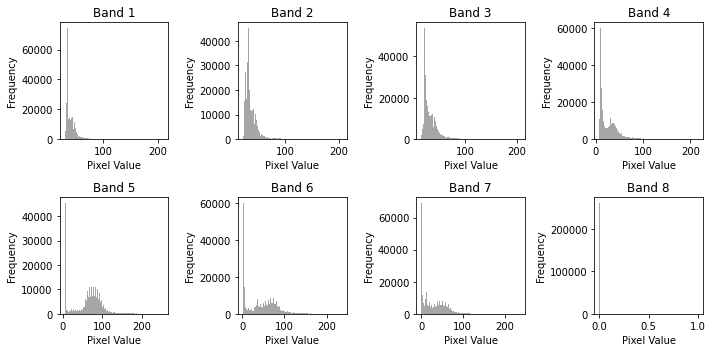

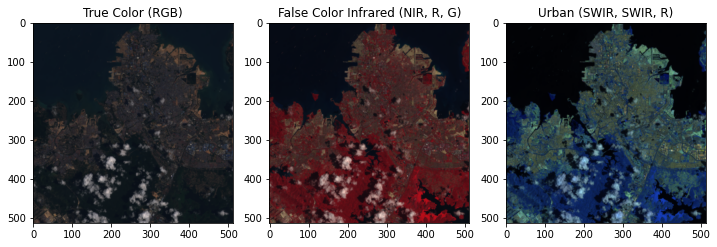

In [179]:
#Determining the RGB bands in images with more than 3 bands
# Display histograms for each band
plt.figure(figsize=(10, 5))
for i in range(image_array.shape[2]):
    plt.subplot(2, 4, i + 1)
    plt.hist(image_array[:, :, i].ravel(), bins=100, color='gray', alpha=0.7)
    plt.title(f'Band {i+1}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize some common band combinations
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_array[:, :, [3, 2, 1]])  # True Color (RGB)
plt.title('True Color (RGB)')
plt.subplot(1, 3, 2)
plt.imshow(image_array[:, :, [4, 3, 2]])  # False Color Infrared (NIR, R, G)
plt.title('False Color Infrared (NIR, R, G)')
plt.subplot(1, 3, 3)
plt.imshow(image_array[:, :, [6, 5, 4]])  # Urban (SWIR, SWIR, R)
plt.title('Urban (SWIR, SWIR, R)')
plt.tight_layout()
plt.show()


In [78]:
#Saving images from tiff

j=0
for i in t_files:
    with rasterio.open(path+'/'+i) as image:
        image_array = image.read()
        image_array = np.transpose(image_array, (1, 2, 0))
    
        if image_array.dtype != 'uint8':
            image_array = (image_array / np.max(image_array)) * 255
            image_array = image_array.astype('uint8')
    print(image_array.shape)
    #image_array = image_array.reshape(256,256,3)
    img_pil = Image.fromarray(image_array)

    # Save the image as PNG
    img_pil.save('{}.png'.format(str(j)))
    j+=1
    #show(image_array)

(192, 169, 3)
(384, 338, 3)
(192, 169, 3)
(193, 170, 3)
(384, 338, 3)
(384, 338, 3)
(384, 338, 3)
(384, 338, 3)
(192, 169, 3)
(192, 169, 3)
(384, 338, 3)
(386, 340, 3)
(384, 338, 3)
(192, 169, 3)
(192, 169, 3)
(192, 169, 3)


In [211]:
#images with band more than 3
j=16
for i in t_files:
    with rasterio.open(path+'/'+i) as image:
        image_array = image.read()
        image_array = np.transpose(image_array, (1, 2, 0))
    
        if image_array.dtype != 'uint8':
            image_array = (image_array / np.max(image_array)) * 255
            image_array = image_array.astype('uint8')
    print(image_array.shape)
    #image_array = image_array.reshape(256,256,3)
    img_pil = Image.fromarray(image_array[:, :, [3, 2, 1]])

    # Save the image as PNG
    img_pil.save('{}.png'.format(str(j)))
    j+=1

(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 512, 8)
(512, 

##### Image segementation

I have decided to let my HR images to have 512 x 512 images
So the codes below is used to divide images with very high dimensions into pieces

In [52]:
height, width, channels = a.shape

# Divide the image into four equal parts
part_height = height // 2
part_width = width // 2

# Extract four parts from the image
part1 = image_array[:part_height, :part_width, :]
part2 = image_array[:part_height, part_width:, :]
part3 = image_array[part_height:, :part_width, :]
part4 = image_array[part_height:, part_width:, :]

# Save each part as PNG
Image.fromarray(part1).save('gart1.png')
Image.fromarray(part2).save('gart2.png')
Image.fromarray(part3).save('gart3.png')
Image.fromarray(part4).save('gart4.png')


###### Increasing Size of Data

In [207]:
for i in range(0,16):
    image = Image.open('{}.png'.format(str(i)))
    #image.thumbnail((512, 512))
    #print(image.size)
    image = image.resize((512, 512))
    #print(image.size)
    image.save('{}.png'.format(str(i)))

In [331]:
def split_image(image, patch_size):
    """
    Splits a larger image into smaller patches of specified size.
    
    Parameters:
        image (numpy.ndarray): The larger image to split.
        patch_size (tuple): The size of each patch (height, width).
        
    Returns:
        List of numpy.ndarray: List of smaller image patches.
    """
    patches = []
    height, width = image.shape[:2]
    #height, width = image.size
    patch_height, patch_width = patch_size
    
    for x in range(0, width, patch_width):
         for y in range(0, height, patch_height):
            patch = image[y:y+patch_height, x:x+patch_width]
            patches.append(patch)
            
    return patches




In [218]:
# the size of the patches
patch_size = (512, 512)

In [203]:

# Split the image into patches
patches = split_image(img, patch_size)

# Save each patch as PNG
for i, patch in enumerate(patches):
    patch_img = Image.fromarray(patch)
    patch_img.save(f'patch_{i}.png')


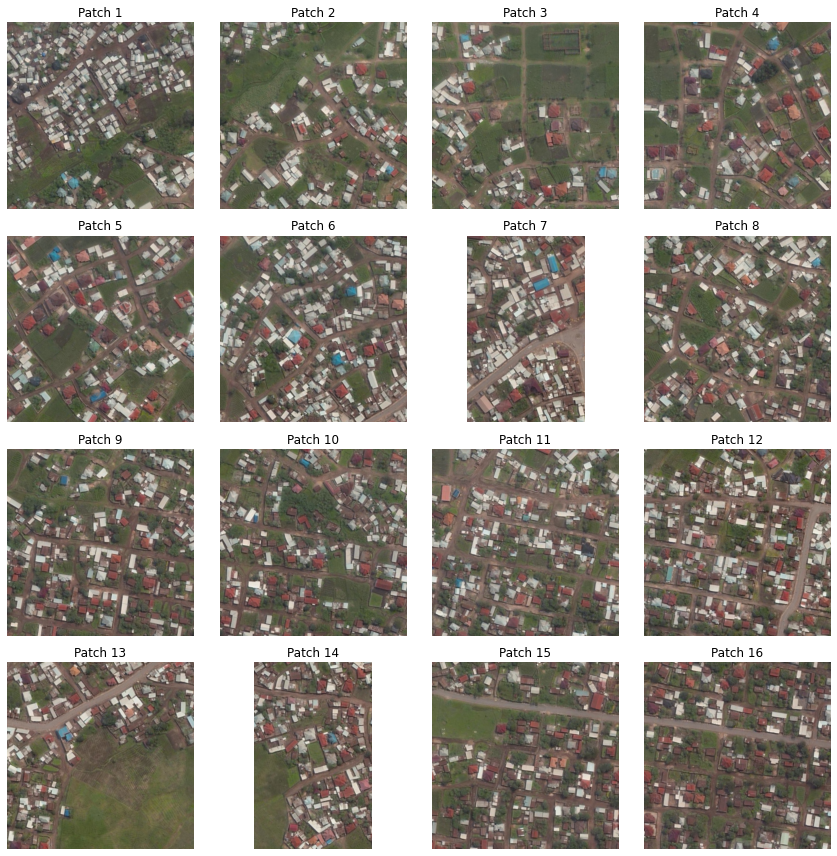

In [265]:
num_rows = 4  # Number of rows of patches in the plot
num_cols = 4  # Number of columns of patches in the plot
total_patches = num_rows * num_cols

plt.figure(figsize=(12, 12))

for i in range(total_patches):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(parts[i])
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Patch {i + 1}')

plt.tight_layout()
plt.show()

In [317]:
#saving the images
path = 'jet/'
b_files = os.listdir(path)


In [332]:
imr = Image.open(path+b_files[0])
imr = np.asarray(imr)
pat = split_image(imr, patch_size)

In [333]:
len(pat)

60

In [325]:
num = 0
for i in b_files:
    imr = Image.open(path+i)
    imr = np.asarray(imr)
    patches = split_image(imr, patch_size)
    for patch in patches:
        f_im = Image.fromarray(patch)
        f_im.save('jet{}.png'.format(num))
        num+=1

In [286]:
imr = Image.open('0.png')

In [287]:
x,y = imr.size

In [288]:
x

512

In [303]:
num = 0
files = os.listdir()
for f in files:
    if '.png' in f:
        imr = Image.open(f)
        x,y = imr.size
        if (x==512) and (y==512):
           # shutil.move('./'+f,'Processed_Data/{}.png'.format(num))
            #num+=1
            pass
        else:
            imr = imr.resize((512, 512))
            #print(image.size)
            imr.save('Processed_Data/ad{}'.format(f))
            #shutil.move('./'+f,'Processed_Data/{}'.format(f))
            num+=1

##### # Renaming Files

In [305]:
#remane
path = 'r/'
r_files = os.listdir(path)


In [307]:
for f in r_files:
    source = path+f
    dest = path+'re'+f
    os.rename(source, dest)

In [31]:
path = 'jet/'
files = os.listdir(path)


In [33]:
files[1]
print(files[1])
#image = Image.open(path+files[1])
#image = image.resize((512, 512))
print(image.size)

64_im.png
(512, 512)


In [30]:
num=1
for f in files:
    image = Image.open(path+f)
    #print(image.size)
    image = image.resize((512, 512))
    print(image.size)
    image.save(path+str(num)+'_im.png')
    num+=1

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

In [32]:
moveto = 'Processed_Data/'
for f in files:
    if 'im' in f:
        src = path+f
        dst = moveto+f
        shutil.move(src,dst)

In [10]:
image.thumbnail((512, 512))

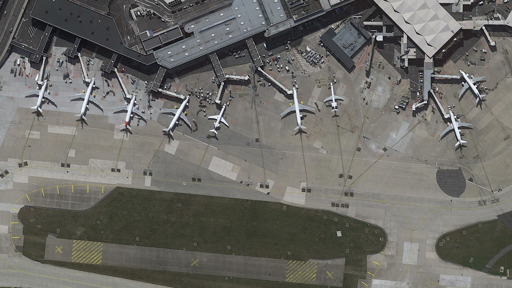

In [11]:
image

In [4]:
#Low resolution images creation
hr_path = 'Processed_Data/HR/'
lr_path = 'Processed_Data/LR/'
hr_files = os.listdir(hr_path)
for im_path in hr_files:
    hr_img =  Image.open(hr_path+im_path)
    #print(image.size)
    lr_img = hr_img.resize((256, 256))
    lr_img.save(lr_path+im_path)